In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


# Load the data  import pandas as pd 
df = pd.read_csv("../data/cleanedDataset.csv")

## Exploring the data

In [2]:
df.head()

,Unnamed: 0,title,rank,date,artist,url,region,streams
0,0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,253019.0
1,10123748,Despacito (Featuring Daddy Yankee),1,2017-04-07,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Dominican Republic,11681.0
2,1305825,ภาพจำ,1,2018-04-12,Pop Pongkool,https://open.spotify.com/track/4YRpjJaJpiI36HM...,Thailand,15477.0
3,2943946,Te Boté - Remix,1,2018-04-27,"Nio Garcia, Casper Magico, Bad Bunny, Darell, ...",https://open.spotify.com/track/3V8UKqhEK5zBkBb...,Honduras,12869.0
4,19131998,Binibini,1,2021-04-16,Zack Tabudlo,https://open.spotify.com/track/2X5AFygz5SDYlXa...,Philippines,401678.0


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,104561.0,1.186794e+07,7.547610e+06,0.0,5158617.0,10628993.0,18360865.0,25275499.0
rank,104561.0,8.284056e+01,5.817908e+01,1.0,31.0,75.0,130.0,200.0
streams,104561.0,6.872181e+04,1.666553e+05,1001.0,5254.0,20679.0,62233.0,8611591.0


In [4]:
df.dtypes

Unnamed: 0      int64
title          object
rank            int64
date           object
artist         object
url            object
region         object
streams       float64
dtype: object

In [5]:
# check if there are any Null values
df.isnull().sum()

Unnamed: 0    0
title         0
rank          0
date          0
artist        0
url           0
region        0
streams       0
dtype: int64

## Plotting a couple of features

C:\Users\patr5\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\patr5\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


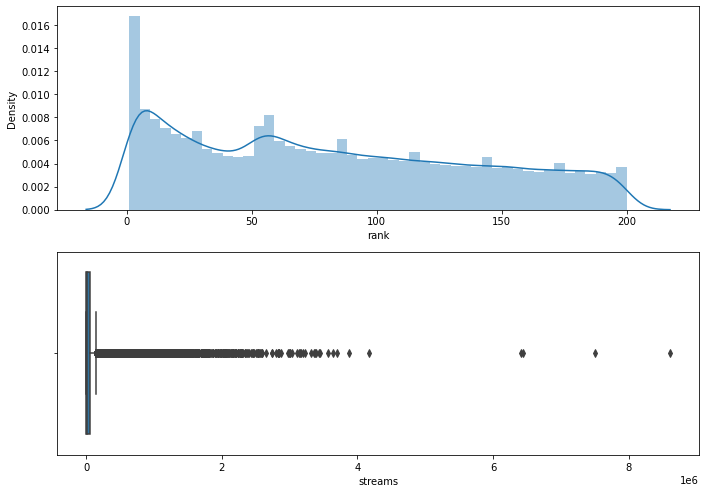

In [7]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['rank'])
fig.add_subplot(2,1,2)
sns.boxplot(df['streams'])
plt.tight_layout()

Text(0.5, 1.0, 'Strams vs Rank')

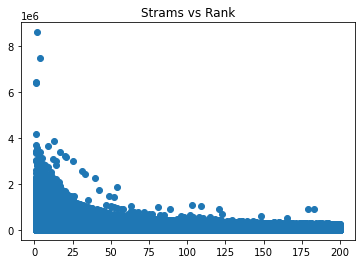

In [3]:
X = df.iloc[:, 2:3].values # Rank
y = df.iloc[:, 7].values # Streams

plt.scatter(X, y)
plt.title("Strams vs Rank")

# Trying models

Well. Its clearly not linear

In [4]:
#Feature Selection 
#X = df.iloc[:, 2:3].values # Rank
singleArtistDF =df.loc[df['artist'] == "Ed Sheeran"]

y = singleArtistDF.iloc[:, 7].values  # Rank
X = singleArtistDF.iloc[:, 2:3].values # Streams

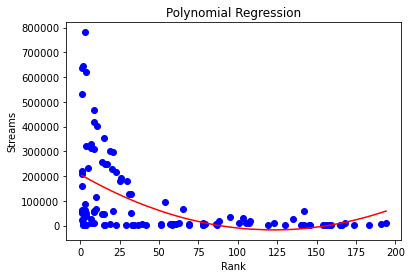

In [8]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Rank')
plt.ylabel('Streams')
 
plt.show()

In [9]:
y_pred = lin2.predict(X_poly)
print(r2_score(y, y_pred))


0.25343770385234266


Text(0, 0.5, 'rank')

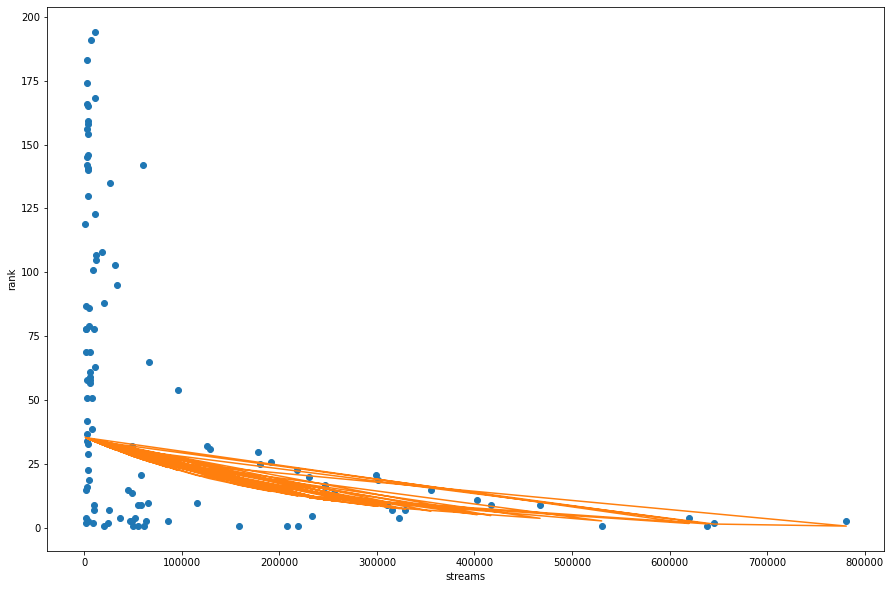

In [10]:
# Create a exponential regression model

ekspo_fit = np.polyfit(singleArtistDF['streams'], np.log(singleArtistDF['rank']), 1)

y_predicted = np.exp(ekspo_fit[1]) * np.exp(ekspo_fit[0]*singleArtistDF['streams'])
plt.figure(figsize=(15, 10))
plt.plot(singleArtistDF['streams'], singleArtistDF['rank'], "o")
plt.plot(singleArtistDF['streams'], y_predicted)
plt.xlabel('streams')
plt.ylabel('rank')

## Number of songs in a specifc year

In [11]:
singleArtistDF = df.loc[df['artist'] == "Ed Sheeran"] # eddy BOII i choose youu!

In [12]:
dataForEachMonthOfYear = []
yearAndMonth = []
formattedDateForGraph = []

year = 2017
month = 1

searchString = ""

for i in range(60):
    
    if (i == 11 or i == 22 or i == 33 or i == 44 or i == 55): 
        searchString = str(year) + '-' + str(month)
        dataForEachMonthOfYear.append(singleArtistDF.loc[singleArtistDF['date'].str.contains(pat = searchString)])
        yearAndMonth.append(str(year) + '.' + str(month))
        #print(searchString)
        year = year + 1 #Changes the year
        month = 1 
    if month < 10:    
        searchString = str(year) + '-' + '0' +str(month)
    else:
        searchString = str(year) + '-' + str(month)
    
    #print(searchString)
    dataForEachMonthOfYear.append(singleArtistDF.loc[singleArtistDF['date'].str.contains(pat = searchString)])
    yearAndMonth.append(str(year) + '.' + str(month))
    
    month = month + 1
    i + 1
    

In [13]:
yearAndMonth

['2017.1',
 '2017.2',
 '2017.3',
 '2017.4',
 '2017.5',
 '2017.6',
 '2017.7',
 '2017.8',
 '2017.9',
 '2017.10',
 '2017.11',
 '2017.12',
 '2018.1',
 '2018.2',
 '2018.3',
 '2018.4',
 '2018.5',
 '2018.6',
 '2018.7',
 '2018.8',
 '2018.9',
 '2018.10',
 '2018.11',
 '2018.12',
 '2019.1',
 '2019.2',
 '2019.3',
 '2019.4',
 '2019.5',
 '2019.6',
 '2019.7',
 '2019.8',
 '2019.9',
 '2019.10',
 '2019.11',
 '2019.12',
 '2020.1',
 '2020.2',
 '2020.3',
 '2020.4',
 '2020.5',
 '2020.6',
 '2020.7',
 '2020.8',
 '2020.9',
 '2020.10',
 '2020.11',
 '2020.12',
 '2021.1',
 '2021.2',
 '2021.3',
 '2021.4',
 '2021.5',
 '2021.6',
 '2021.7',
 '2021.8',
 '2021.9',
 '2021.10',
 '2021.11',
 '2021.12',
 '2022.1',
 '2022.2',
 '2022.3',
 '2022.4',
 '2022.5']

In [14]:
# Feature Selection 
#X = df.iloc[:, 2:3].values # Rank
singleArtistDF = df.loc[df['artist'] == "Ed Sheeran"]

#y = [allSongsFrom2017['title'].count(), allSongsFrom2018['title'].count(), allSongsFrom2019['title'].count(), allSongsFrom2020['title'].count(), allSongsFrom2021['title'].count()]  # Rank
#X = [2017, 2018, 2019, 2020, 2021] # Streams
y = dataForEachMonthOfYear
X = yearAndMonth 



[11, 5, 18, 1, 3, 2, 0, 0, 0, 0, 4, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 14, 13, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0, 13, 2, 0, 0, 0, 0, 0, 0]


Text(0.5, 1.0, 'Numbers of published songs pr year')

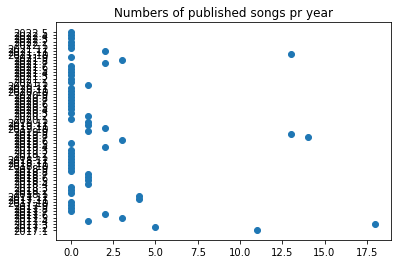

In [15]:
#X = [float(i) for i in X]
y[1]['title'].count()
newy = []

for i in range(len(y)):
    newy.append(y[i]['title'].count())

print(newy)    
plt.scatter(newy, X)
plt.title("Numbers of published songs pr year")

## Polynomral with data pr year

In [16]:
# Fetching all songs from specific year from eddy Boiiii
allSongsFrom2017 =  singleArtistDF.loc[singleArtistDF['date'].str.contains(pat = '2017')]
allSongsFrom2018 =  singleArtistDF.loc[singleArtistDF['date'].str.contains(pat = '2018')]
allSongsFrom2019 =  singleArtistDF.loc[singleArtistDF['date'].str.contains(pat = '2019')]
allSongsFrom2020 =  singleArtistDF.loc[singleArtistDF['date'].str.contains(pat = '2020')]
allSongsFrom2021 =  singleArtistDF.loc[singleArtistDF['date'].str.contains(pat = '2021')]

allSongsFrom2017['title'].count()

48

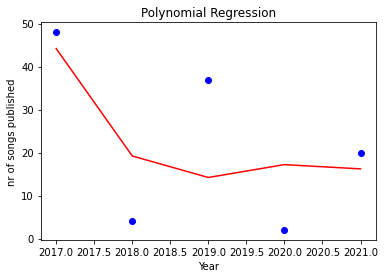

mean_squared_error:  202.18715303993613
0.37933707932239635


In [20]:
X = [2017, 2018, 2019, 2020, 2021]
y = [allSongsFrom2017['title'].count(), allSongsFrom2018['title'].count(), allSongsFrom2019['title'].count(), allSongsFrom2020['title'].count(), allSongsFrom2021['title'].count()]

X = np.array(X) # Reshaping 1d array to 2d
y = np.array(y) # Reshaping 1d array to 2d
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)



poly = PolynomialFeatures(4)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('nr of songs published')
 
plt.show()
y_pred = lin2.predict(X_poly)
from sklearn.metrics import mean_squared_error
print("mean_squared_error:", mean_squared_error(y, y_pred))


print(r2_score(y, y_pred))

## Using the predictive model

In [332]:
yearToPredict = 2017

poly_reg = PolynomialFeatures(degree=4)
temp = lin2.predict(poly_reg.fit_transform([[yearToPredict]]))

"{:.0f}".format(float(temp))




'44'

In [344]:
import joblib
joblib.dump(lin2, '../5 - Communicate results/regressionPredictor.pkl')

['../5 - Communicate results/regressionPredictor.pkl']

array([[-0.79264736]])

## converting the model 

In [336]:
# creating the model object
model = PolynomialFeatures(degree=4)

# fitting model with X_train - area, y_train - price
model.fit(X, y)

model.predict([[5000]])

AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

## Linear regression

Text(0, 0.5, 'nr of songs published')

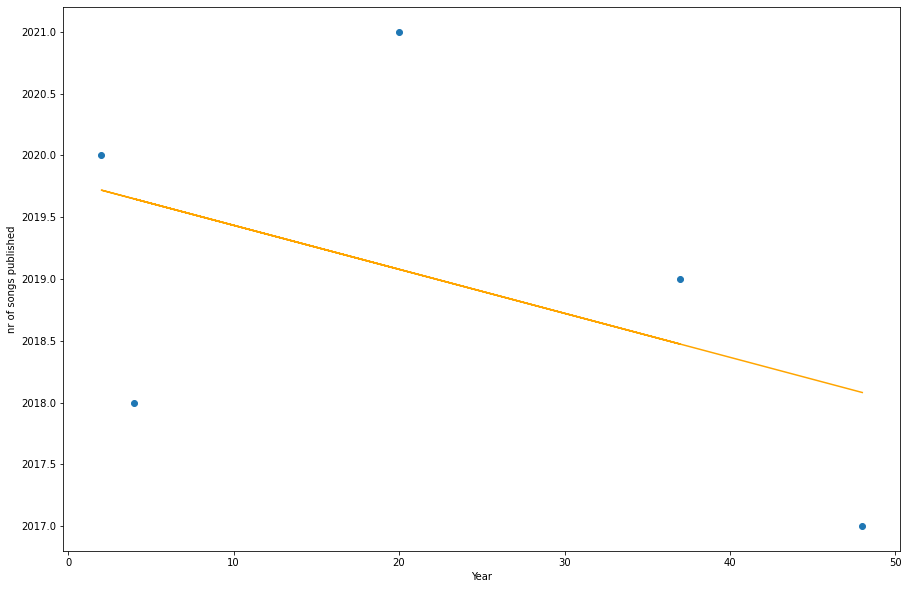

In [334]:
X = [allSongsFrom2017['title'].count(), allSongsFrom2018['title'].count(), allSongsFrom2019['title'].count(), allSongsFrom2020['title'].count(), allSongsFrom2021['title'].count()]
y = [2017, 2018, 2019, 2020, 2021]

X = np.array(X) # Reshaping 1d array to 2d
y = np.array(y) # Reshaping 1d array to 2d
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Create a linear regression model.
regressor = LinearRegression()

#Train the model using the dataset.
regressor.fit(X, y)

values_predicted = regressor.predict(X)

plt.figure(figsize=(15,10))
plt.scatter(X, y,)
plt.plot(X, values_predicted, color='orange')
plt.xlabel('Year')
plt.ylabel('nr of songs published')